# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

# Libraries

In [2241]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import difflib as dl

# Configurations

### - Pandas

In [2242]:
# this configuration will remove the restriction on the number of columns displayed
pd.options.display.max_columns = None
# this configuration will display floats with up to 2 decimal places
pd.options.display.precision   = 2

### - Matplotlib

In [2243]:
# change the default figure size for
plt.figure(figsize=(30,30))

# set the colors (Excerpt From: Alberto Boschetti. “Python Data Science Essentials.”)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', \
                                        ['red','blue','green','orange','indigo','yellow','violet'])

<Figure size 2160x2160 with 0 Axes>

# Retrieve data

In [2244]:
# Retrieve data
# Load the data from the file ply_stats.csv using pandas library.
ply_orig = pd.read_csv('nba_players_stats.csv', sep=',')
ply = ply_orig.copy()

# Observe the data which was loaded

In [2245]:
# Check that the same rows and columns as the data source have been loaded
ply.shape

(512, 29)

In [2246]:
# Get the column names
ply.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [2247]:
# Get the column types
ply.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [2248]:
# Display players details and game data
# G   - Games
# GS  - Games Started
# MP  - Minutes Played
# ORB - Offensive Rebounds
# DRB - Defensive Rebounds
# TRB - Total Rebounds
# AST - Assists
# STL - Steals
# BLK - Blocks
# TOV - Turnovers
# PF  - Personal Fouls
ply.loc[0:15,['Rk','Player','Age','Pos','Tm','G','GS','MP','ORB','DRB','TRB', \
                             'AST','STL','BLK','TOV','PF']]

,Rk,Player,Age,Pos,Tm,G,GS,MP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,1,Precious Achiuwa,21,PF,MIA,35,2,491,46,95,141,20,15,19,32,58
1,2,Jaylen Adams,24,PG,MIL,7,0,18,0,3,3,2,0,0,0,1
2,3,Steven Adams,27,C,NOP,33,33,918,133,161,294,69,29,20,50,63
3,4,Bam Adebayo,23,C,MIA,33,33,1119,72,241,313,179,29,34,98,80
4,5,LaMarcus Aldridge,35,C,SAS,21,18,544,17,77,94,36,8,18,20,36
5,6,Ty-Shon Alexander,22,SG,PHO,3,0,8,0,1,1,1,0,0,0,1
6,7,Nickeil Alexander-Walker,22,SG,NOP,28,3,495,5,61,66,54,28,9,32,44
7,8,Grayson Allen,25,SG,MEM,23,12,551,8,57,65,50,23,3,21,30
8,9,Jarrett Allen,22,C,TOT,35,17,977,111,235,346,60,16,59,54,55
9,9,Jarrett Allen,22,C,BRK,12,5,320,38,87,125,20,7,19,22,21


In [2249]:
# Display players play statistics and points data
# FG  - Field Goals
# FT  - Free throw
# 2P  - Two pointer
# 3P  - Three pointer
ply.loc[0:15,['Rk','Player','Age','Pos','Tm','FG','FGA','FG%','FT','FTA','FT%', \
                                      '2P','2PA','2P%','3P','3PA','3P%','PTS']]

,Rk,Player,Age,Pos,Tm,FG,FGA,FG%,FT,FTA,FT%,2P,2PA,2P%,3P,3PA,3P%,PTS
0,1,Precious Achiuwa,21,PF,MIA,84,145,0.58,44,81,0.54,84,145,0.58,0,0,NaN,212
1,2,Jaylen Adams,24,PG,MIL,1,8,0.12,0,0,NaN,1,6,0.17,0,2,0.00,20000
2,3,Steven Adams,27,C,NOP,115,187,0.61,35,79,0.44,115,186,0.62,0,1,0.00,265
3,4,Bam Adebayo,23,C,MIA,236,419,0.56,160,189,0.85,234,413,0.57,2,6,0.05,634
4,5,LaMarcus Aldridge,35,C,SAS,115,248,0.46,31,37,0.84,88,173,0.51,27,75,0.36,28800
5,6,Ty-Shon Alexander,22,SG,PHO,0,3,0.00,0,0,NaN,0,2,0.00,0,1,0.00,0
6,7,Nickeil Alexander-Walker,22,SG,NOP,86,211,0.41,28,35,0.80,56,113,0.50,30,98,0.31,230
7,8,Grayson Allen,25,SG,MEM,67,164,0.41,34,38,0.90,21,51,0.41,46,113,0.41,214
8,9,Jarrett Allen,22,C,TOT,172,257,0.67,123,166,0.74,168,249,0.68,4,8,0.05,471
9,9,Jarrett Allen,22,C,BRK,44,65,0.68,46,61,0.75,44,65,0.68,0,0,NaN,134


In [2250]:
# get basic statistical data
ply.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512.00,512.00,512.00,512.0,512.00,512.00,512.00,509.00,512.00,512.00,479.00,512.00,512.00,505.00,512.00,512.00,480.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00
mean,248.05,26.03,22.52,10.6,512.73,87.33,187.79,0.44,27.22,73.91,0.32,60.11,113.88,0.50,36.66,47.07,0.74,20.81,73.44,94.25,52.93,16.05,10.51,28.81,41.90,333.28
std,141.54,12.10,10.76,12.7,374.17,82.21,170.43,0.12,29.65,75.70,0.14,63.80,116.74,0.14,45.41,56.05,0.17,24.40,66.36,86.46,60.98,13.50,13.06,28.08,31.06,1550.22
min,1.00,-19.00,1.00,0.0,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,126.75,22.00,14.00,0.0,147.75,18.00,43.00,0.39,3.00,9.00,0.29,10.00,22.00,0.44,6.00,8.00,0.67,4.00,18.75,23.00,9.00,4.00,2.00,7.00,14.00,50.00
50%,250.50,25.00,25.00,3.0,497.00,64.50,145.00,0.44,17.00,50.50,0.35,39.00,75.00,0.51,21.00,29.00,0.77,13.00,57.50,73.00,35.00,14.00,6.00,22.00,39.50,180.00
75%,370.25,28.00,33.00,20.0,814.25,131.25,275.00,0.50,45.00,119.25,0.39,88.25,171.00,0.57,48.00,63.25,0.85,27.00,110.00,140.00,69.00,25.00,14.00,40.25,64.00,356.75
max,492.00,280.00,38.00,37.0,1358.00,379.00,764.00,1.00,169.00,411.00,1.00,329.00,543.00,1.00,298.00,363.00,1.00,159.00,357.00,472.00,345.00,63.00,111.00,149.00,228.00,28800.00


# Clean the data

### - Replace null values with 0 or empty string

In [2251]:
# create a dataframe containing column names from the data set
# and a boolean indicating whether there are null values in that column
cwn = pd.DataFrame(ply.isnull().any(axis=0))

In [2252]:
# transform the dataframe index to a list
cwn = cwn[cwn[0]==True].index.to_list()

In [2253]:
# iterate in list and change nulls to 0 or empty string depending on the column type
for col in cwn:    
    # get the data type for the column name in the main data set
    col_type = ply[col].dtype
    # change null values to 0 for floats and integers
    if (col_type == 'float64')|(col_type == 'int64'):
        ply[[col]] = ply[[col]].apply(lambda x:x.fillna(0))
    # change null values to empty string for objects
    elif col_type == 'object':
        ply[[col]] = ply[[col]].apply(lambda x:x.fillna(""))

### - Remove extra white spaces in strings

In [2254]:
# create a dataframe containing column names from the main data set
# and the datatypes for each column
dty = pd.DataFrame(ply.dtypes)

In [2255]:
# create an array containing the column names from the main data set
# with a data type object
dty = dty[dty[0]=='object'].index.to_list()

In [2256]:
# remove white spaces in these columns
for col in dty:
    ply[[col]] = ply[[col]].apply(lambda x:x.str.strip())

## Data Entry Errors

### - Special characters in names and uniqueness

In [2257]:
# check if the Player names are unique for each Rank
# these are expected to be a one to one relationship
if ((len(ply.Rk.unique())==len(ply.Player.unique())) == True):
    print("Player names are unique for each rank.")

else:
    print("Player names are not unique for each rank.")

    # for each Rk, get the count of unique Player names
    plyname = pd.DataFrame(ply.groupby('Rk').agg({'Rk':'min','Player': ['count', 'min', 'max']}))

    # keep only rows where there is only one line for a player
    plyname = plyname.loc[(plyname[('Player','count')] != 1)]

    # remove any rows where there is multiple lines for each player
    # and the player name is consistent for all lines
    plyname = plyname.loc[(plyname[('Player','min')] != plyname[('Player','max')])]

    # remove players records where there are multiple player names for the same Rk
    ply = ply.loc[ply["Rk"].isin(plyname.index)==False]

Player names are unique for each rank.


In [2258]:
# remove invalid characters from names
# some special characters need to be retained since names can have [-] (eg.Anne-marie) and [.] (eg. Paul James Jr.)
# also there might be accented letters in player names which are valid (eg. André) 

### - Outliers and impossible values

In [2259]:
# In the dataset there are fields which can have outliers and impossible values
# Age: cannot be negative and capped at 50
# G  : games played; a team can play a maximum of 82 games, which means that a player's
#      maximum games with a team cannot be more than 82
# GS : same as games
# MP : minutes played, which can be up to 48 mins per game

#### - Age

In [2260]:
# The column skewness will be used to determine whether there are any outliers and 
# impossible values for the 'Age' column. Changes will be made in the column values when column
# is found to be Highly Skewed.
# Highly Skewed     : skewness > +1 or skewness < -1
# Moderately Skewed : skewness between +0.5 and -0.5
# Symmetric         : skewness = 0
# any outliers and impossible values will be changed to the median age
# the median was selected since this is the measure of central tendency which gives the midpoint
# of the distribution of ages for the dataset
# NBA rules specify that the minimum age for a player to be drafted is 19
# There is no upper age limit. The oldest active player as at Feb-2021 is Udonis Haslem (40 years,8 months,8 days)
# Sources: 
# https://en.wikipedia.org/wiki/Eligibility_for_the_NBA_draft
# https://www.oldest.org/sports/active-nba-players/

In [2261]:
# ply['Age'].describe()

In [2262]:
# after carrying out statistical analyses, outliers for age data will be normalised as follows:
# 1. changing negative values with the respective absolute value
# 2. ages values over 190 will be divided by 10, under the assumption that this was caused by a data entry error (extra zero input)
# 3. if the data is still found to be skewed, ages outside the range 19 - 50 will be replaced by the median age

In [2263]:
# change negative ages to the respective absolute value
ply.loc[(ply['Age'] < 0), 'Age'] = ply['Age'].abs()

In [2264]:
# change age over 190 by value/10
ply.loc[(ply['Age'] > 190), 'Age'] = ply['Age']/10

In [2265]:
# check skewness of Age and replace ages under 19 and over 50 by median, when age is highly skewed
if (round(abs(round(ply['Age'].skew(),1)),1) > 0.5):
    ply.loc[(ply['Age'] < 19) | (ply['Age'] > 100), 'Age'] = ply['Age'].median()

#### - Game details

In [2266]:
# for games played and games started, any values which exceed 82 (max games played limit) will be changed to 82

In [2267]:
# ply['G'].describe()

In [2268]:
ply.loc[(ply['G'] > 82), 'G'] = 82

In [2269]:
# ply['GS'].describe()

In [2270]:
ply.loc[(ply['GS'] > 82), 'GS'] = 82

In [2271]:
# for minutes played, the maximum value will be calculated as the Games Played multiplied by 48

In [2272]:
# ply['MP'].describe()

In [2273]:
ply.loc[(ply['MP'] > (ply['G'] * 48)), 'MP'] = (ply['G'] * 48)

### - Invalid input

#### - Codes

In [2274]:
# the columns 'Pos' and 'Tm' are constrained by valid values which can be any one of a specific set
# the data for these columns should also be in upper-case
# a custom function was designed to match and update values for a column within a set

In [2275]:
# function will match and update values for a column in the dataset
def match_valid_val(col, valid_val):
    
    #change values to upper case, remove nulls and trim white spaces
    ply[[col]] = ply[[col]].apply(lambda x:x.fillna("").str.strip().str.upper())
    
    # create a list of unique values in col
    unique_val=ply[col].unique().tolist()
    
    # create a set with errors
    errors = set(unique_val) - set(valid_val)
    
    # display any differences between the two sets
    if (len(errors) == 0):
    
        # all values are valid
        print('All values are valid')
    
    else:

        # data entry errors found
        print('Errors found in ' + col + ': ' + str(errors))
        
        # for each value
        for val in errors:

            # find the closest match in the valid values
            closest_val = dl.get_close_matches(val, valid_val, n=1)
            
            print("Value " + str(val) + " will be replaced by " + str(closest_val))
            
            # replace with an equivalent valid value
            ply[col].replace({val:closest_val}, inplace=True)
        
        print('Errors fixed.')

    return

### - Invalid input

In [2276]:
# clean up valid values for Pos column
match_valid_val('Pos', ['PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF'])

Errors found in Pos: {'SGA', 'PFA', 'SF.'}
Value SGA will be replaced by ['SG']
Value PFA will be replaced by ['PF']
Value SF. will be replaced by ['SF']
Errors fixed.


In [2277]:
# clean up valid values for Pos column
match_valid_val('Tm', ['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK', 'CLE', 'ORL', 'LAL', \
            'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC', 'GSW', \
            'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU'])

Errors found in Tm: {'H0U'}
Value H0U will be replaced by ['HOU']
Errors fixed.


### - Validate calculations in statistical data

In [2278]:
# statistical data should reconcile in that Totals should be equal to the individual components

In [2279]:
# function to clean up points in the dataset
def clean_pts(ptcolname):

    ply[ptcolname] =  ply[ptcolname].fillna(0)
    ply[ptcolname + 'A'] =  ply[ptcolname + 'A'].fillna(0)
    ply[ptcolname + '%'] =  ply[ptcolname + '%'].fillna(0)

    # replace attempts with 0 where the value is less than 0
    ply[ptcolname + 'A'] = np.where(ply[ptcolname + 'A'] < 0,0,ply[ptcolname + 'A'])

    # replace points with 0 where attempts is 0
    ply[ptcolname] = np.where(ply[ptcolname + 'A'] == 0,0,ply[ptcolname])

    # replace % with 0 where attempts is 0
    ply[ptcolname + '%'] = np.where(ply[ptcolname + 'A'] == 0,0,ply[ptcolname + '%'])
    ply[ptcolname + '%'] = np.where(ply[ptcolname]       == 0,0,ply[ptcolname + '%'])

    # replace % with points/attempts where points is not 0 (implies that attempts is not 0 either)
    ply[ptcolname + '%'] = np.where(ply[ptcolname] != 0, round(ply[ptcolname]/ply[ptcolname+'A'],4), 0)
    
    return

In [2280]:
# clean points for three-pointers
clean_pts('3P')

In [2281]:
# clean points for two-pointers
clean_pts('2P')

In [2282]:
# clean points for free throws
clean_pts('FT')

In [2283]:
# check total points
# these should equal to 3P + 2P + FT
# total points will be replaced by the correct total where this does not match
ply.loc[(ply['PTS'] != ((ply['3P'] * 3) + (ply['2P'] * 2) + ply['FT'])),'PTS' ] = \
                                                                (ply['3P'] * 3) + (ply['2P'] * 2) + ply['FT']

In [2284]:
# total points are capped at 2000
ply.loc[(ply['PTS'] > 2000), 'PTS'] = 2000

In [2285]:
# check field goals
# FG = 2P + 3P
# FGA= 2PA+ 3PA
# FG : Field goals
# FGA: Field goal attempts
ply.loc[(ply['FG'] != (ply['2P']  + ply['3P'])) ,'FG' ] = ply['2P']  + ply['3P']
ply.loc[(ply['FGA']!= (ply['2PA'] + ply['3PA'])),'FGA'] = ply['2PA'] + ply['3PA']
# clean points for field goals
clean_pts('FG')

In [2286]:
# check offensive and defensive rebounds
# TRB = ORB + DRB
# TRB : Total Rebounds
# ORB : Offensive Rebounds
# DRB : Defensive Rebounds
ply.loc[(ply['TRB'] != (ply['ORB'] + ply['DRB'])), 'TRB'] = ply['ORB'] + ply['DRB']

In [2287]:
# check personal fouls
# A player is allowed maximum of 6 PF per game
# Change the value for PF when this exceeds Number of Games x 6
ply.loc[(ply['PF'] > (ply['G'] * 6)), 'PF'] = (ply['G'] * 6)

## Create a cleaned copy of the data source

In [2288]:
# Save cleaned dataframe to a new csv
ply.to_csv('cleaned_nba_players_stats.csv', index=False)

## Validate data cleaning process

In [2289]:
df1 = pd.read_csv('nba_players_stats.csv', sep=',')
df2 = pd.read_csv('cleaned_nba_players_stats.csv', sep=',')

In [2290]:
# compare number of rows and columns
if (df1.shape == df2.shape):
    print("Files contain same number of rows and columns.")
else:
    print("Files contain different number of rows and columns.")

Files contain same number of rows and columns.


In [2291]:
# check for nulls
print("Data source contains nulls: " + str(df1.isnull().values.any()))
print("Cleaned data contains nulls: " + str(df2.isnull().values.any()))

Data source contains nulls: True
Cleaned data contains nulls: False


In [2292]:
# check transformations for Pos feature
print("Position transformations")
print("Data source :" + str(df1['Pos'].unique().tolist()))
print("Cleaned Data:" + str(df2['Pos'].unique().tolist()))

Position transformations
Data source :['PF', 'PG', 'C', 'SG', 'SG ', 'SF', 'SGa', 'SF.', 'PFa', 'PF ', 'C ', ' PG', 'PG-SG ', 'sg', 'Sf', ' SG', 'SF-PF', 'pg', ' SF', 'Pg']
Cleaned Data:['PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF']


In [2293]:
# check transformations for Tm feature
print("Team transformations")
print("Data source :" + str(df1['Tm'].unique().tolist()))
print("Cleaned Data:" + str(df2['Tm'].unique().tolist()))

Team transformations
Data source :['MIA', 'MIL', 'NOP', 'SAS ', ' PHO', 'MEM', ' TOT', 'BRK ', 'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'PHO', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'SAS', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BRK', 'BOS', 'HOU', 'OKC ', ' NOP', ' PHI', 'DET ', 'TOT', ' BRK', ' IND', 'MIL ', ' SAS', 'ORL ', ' ORL', 'CLE ', 'H0U', 'NyK', ' MEM', 'MIA ', ' WAS', 'IND ', ' BOS', 'GSW ', 'MEM ']
Cleaned Data:['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK', 'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']


# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [2294]:
# create a dataframe with the total points (scored with all teams) for all players
# the columns FT, 2P, 3P and PTS will be considered for this analysis
# PTS = (3P x 3) + (2P x 2) + FT
agg = pd.DataFrame(ply.groupby(['Rk','Player']).agg({'Player':'min','PTS':"sum", '3P':"sum", '2P':"sum", 'FT':"sum"}))

# drop the index column since this is not required
agg.reset_index(drop=True,inplace=True)

# sort by total points in descending order and keep the top 5
# the rest of the analysis will be carried out on this subset of the data
# for efficiency purposes
top_5 = agg.sort_values(by=['PTS'], ascending=False).head(5)

# reset the index
top_5.reset_index(drop=True,inplace=True)

# add a column for the top 5 ranking
top_5.insert(0, 'Rank', range(1, len(top_5) + 1))

# next let's analyse the composition of the total points
# calculate the points value for each category
top_5["3PT"]=top_5["3P"] * 3
top_5["2PT"]=top_5["2P"] * 2
top_5["FTT"]=top_5["FT"]
              
# for this purpose we will add columns representing the % contribution of each field goal towards the total points
top_5["3PC%"]=top_5["3PT"]/top_5["PTS"]
top_5["2PC%"]=top_5["2PT"]/top_5["PTS"]
top_5["FTC%"]=top_5["FTT"]/top_5["PTS"]

# display top 5
top_5.head()

,Rank,Player,PTS,3P,2P,FT,3PT,2PT,FTT,3PC%,2PC%,FTC%
0,1,James Harden,1568,202,298,366,606,596,366,0.39,0.38,0.23
1,2,Bradley Beal,1053,74,294,243,222,588,243,0.21,0.56,0.23
2,3,Stephen Curry,1039,169,174,184,507,348,184,0.49,0.33,0.18
3,4,Giannis Antetokounmpo,1015,39,329,240,117,658,240,0.12,0.65,0.24
4,5,Damian Lillard,1013,146,169,237,438,338,237,0.43,0.33,0.23


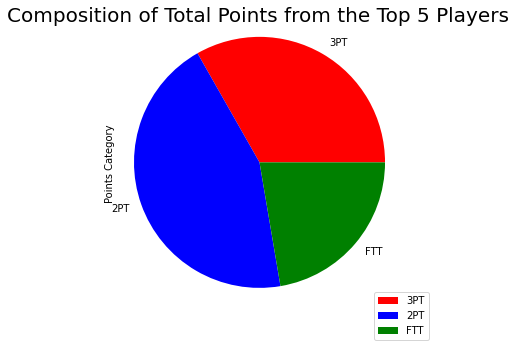

In [2295]:
# create a dataframe with the totals from all five players
top_5_totals = pd.DataFrame(top_5.agg({'3PT':"sum", '2PT':"sum", 'FTT':"sum"}))

# set the column name
top_5_totals.columns=["Points Category"]    

# set the axis title
top_5_totals.plot.pie(y="Points Category", figsize=(5,5), fontsize="10")

# set the chart title
plt.title('Composition of Total Points from the Top 5 Players', fontsize="20")

# ensure that the pie is a perfect circle
plt.axis("equal")

# place the legend on the lower right and anchor from the figure
plt.legend(bbox_to_anchor=(1,0),loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show()

### Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [2296]:
# create a dataframe with subset of data from the main dataset
# containing the player name, and the features which contain 
# the data entry error i.e. 3P, 3PA and 3P% values
# dimensionality reduction makes the data set more manageable
plysub = pd.DataFrame(ply[['3P','3PA','3P%']])

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.

In [2297]:
# Offensive Player Analysis
# The best offensive players can be identified by measuring:
# Total Points scored by a player (FT + 2P + 3P)
# Number of Assists, since these lead to a team player scoring a point
plyoff = pd.DataFrame(ply.groupby(['Player']).agg({'Player':'min','AST':"sum", 'PTS':"sum"}))

In [2298]:
# get the upper (75%) quartiles for AST and PTS
qtast = plyoff["AST"].quantile(.75)
qtpts = plyoff["PTS"].quantile(.75)

In [2299]:
# keep the top 25% players
plyoff = plyoff[(plyoff["AST"] > qtast) & (plyoff["PTS"] > qtpts)]

In [2300]:
# get the upper (75%) quartiles for AST and PTS
# these will be used to label the points with the best offensive player names
qtast = plyoff["AST"].quantile(.75)
qtpts = plyoff["PTS"].quantile(.75)

In [2301]:
# plyoff.sort_values(by=["PTS","AST"], ascending=False).head(5)

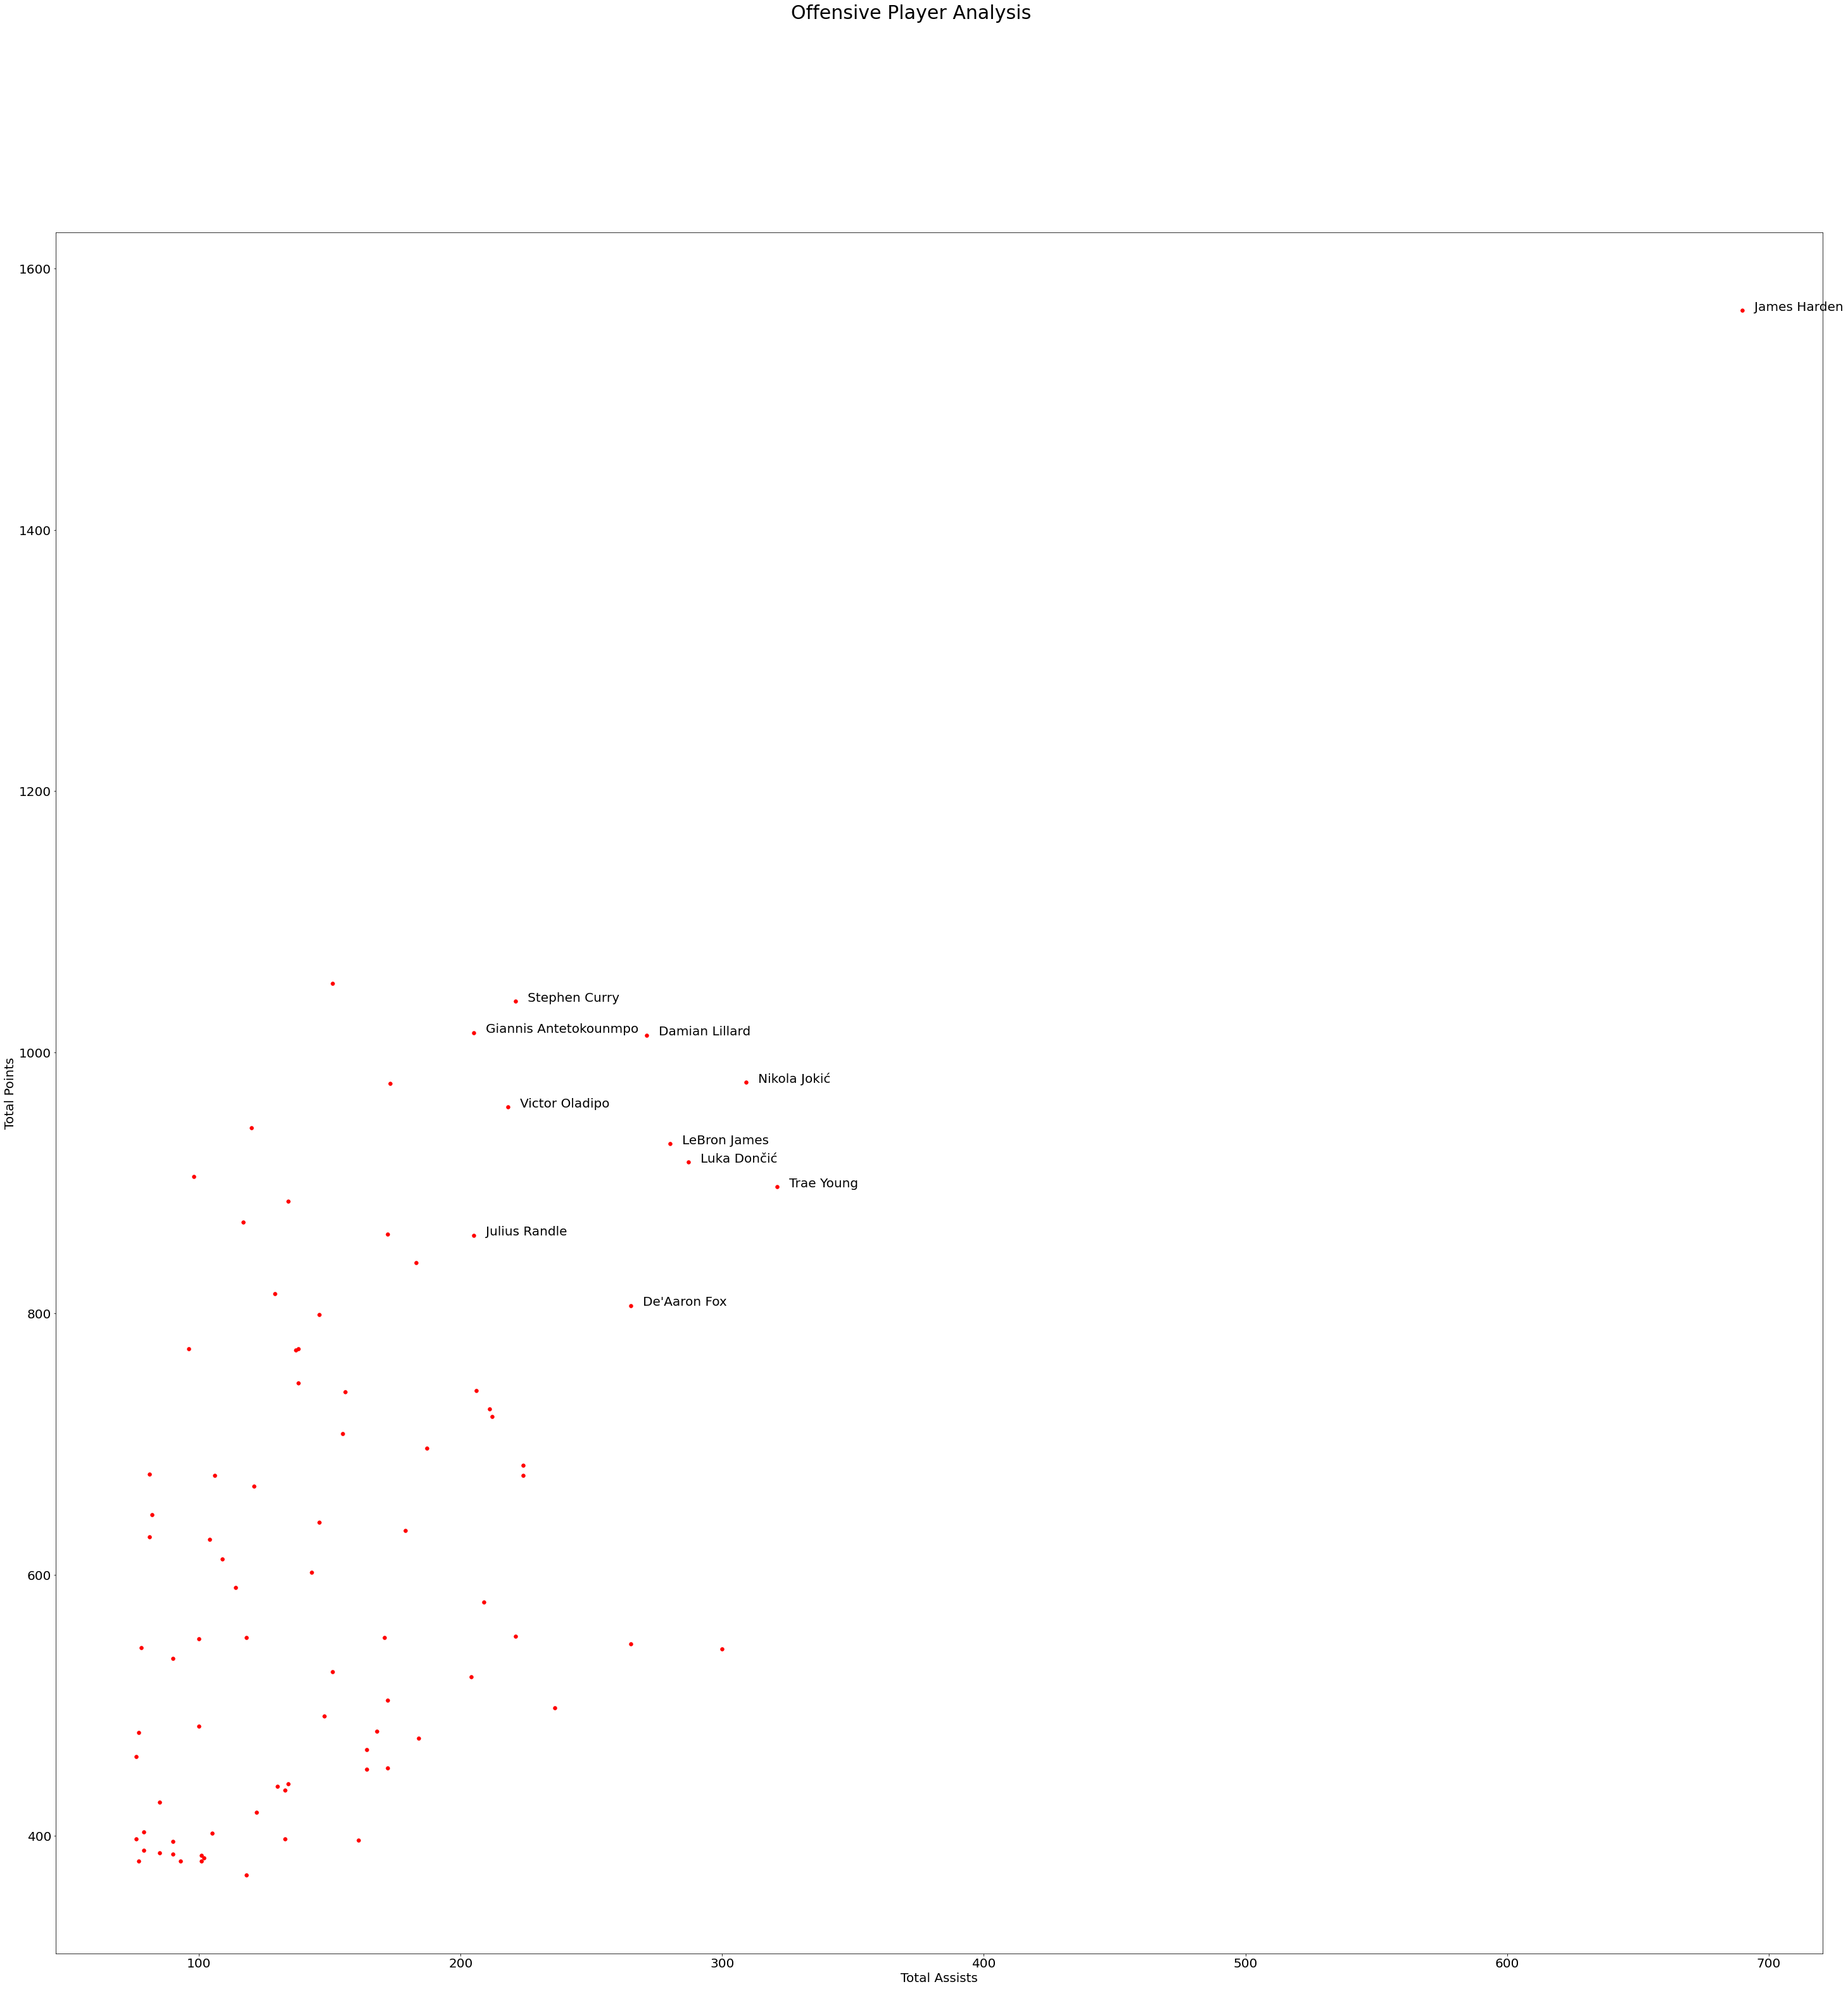

In [2302]:
# create the scatter plot
plyoff.plot.scatter(x="AST", y="PTS", s=30, c="red", figsize=(50,50), fontsize=20)

# add labels
plt.xlabel('Total Assists', fontsize=20)
plt.ylabel('Total Points' , fontsize=20)
plt.suptitle('Offensive Player Analysis', fontsize=30)

# label scatter points for players with Assists and Points over the 75% quantile
for row in plyoff[(plyoff["AST"] > qtast) & (plyoff["PTS"] > qtpts)].itertuples():
    plt.text(row.AST, row.PTS, "   " + row.Player, fontsize=20)

plt.show()

In [2303]:
# Analysis of players points with teams

In [2304]:
# get players with more than one team
plymtm = pd.DataFrame(ply.groupby(["Player"])["Tm"].count())
plymtm = plytm.loc[plytm['Tm'] != 1]

# get players, teams and total pts
plytmpts = pd.DataFrame(ply[['Player','Tm','PTS']])
plytmpts = plytmpts.loc[plytmpts["Player"].isin(plymtm.index)]
plytmpts.set_index('Player')

,Tm,PTS
Player,,
Jarrett Allen,TOT,471
Jarrett Allen,BRK,134
Jarrett Allen,CLE,337
James Harden,TOT,784
James Harden,HOU,198
James Harden,BRK,586
Damian Jones,TOT,34
Damian Jones,PHO,22
Damian Jones,LAL,12


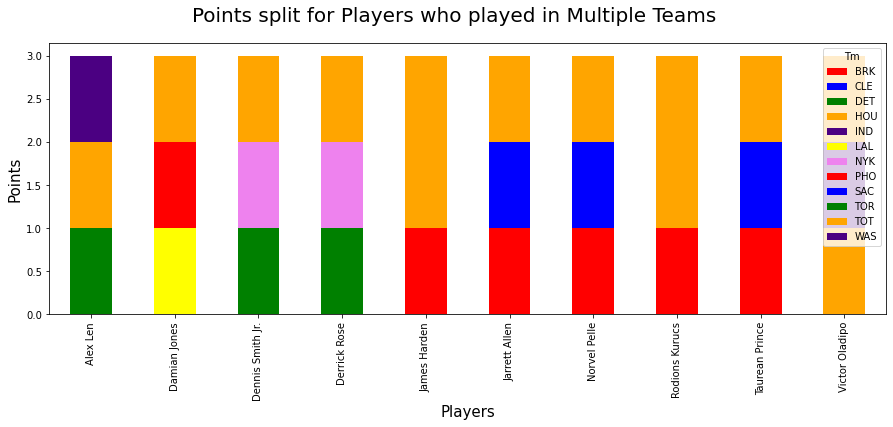

In [2305]:
# create bar graph with players, teams and points
# create the scatter plot
plytmpts.groupby(['Player', 'Tm']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

# add labels
plt.xlabel('Players', fontsize=15)
plt.ylabel('Points', fontsize=15)
plt.suptitle('Points split for Players who played in Multiple Teams', fontsize=20)
    
plt.show()

In [2306]:
# Analysis - Player efficiency

In [2307]:
# Player efficiency is measured using the formula below:
# (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# The acronyms for the formula are listed below.
# References to the data source being used for this analysis are in the parenthesis
# PTS : Total Points (PTS)
# REB : Rebounds (TRB)
# AST : Assists (AST)
# STL : Steals (STL)
# BLK : Blocks (BLK)
# FG  : Field goals (FG)
# FT  : Free throws (FT)
# TO  : Turnovers (TOV)
# GP  : Games played (G)

# Ref: https://en.wikipedia.org/wiki/Basketball_statistics

In [2308]:
# create a dataset with the features required to calculate the player efficiency
plyeff = pd.DataFrame(ply.groupby(['Rk','Player']).\
                      agg({'Player':'min', 'PTS':"sum", 'TRB':"sum", 'AST':"sum", 'STL':"sum", 'STL':"sum", \
                            'BLK':"sum", 'FGA':"sum",'FG':"sum", 'FTA':"sum",'FT':"sum", 'TOV':"sum", 'G':"sum", \
                            'MP':"sum" }))

# drop the index column since this is not required
plyeff.reset_index(drop=True,inplace=True)

# add a column to store efficiency
# players who did not play games will have efficiency set to 0
# all others apply the efficiency formula
plyeff["EFF"] = np.where(plyeff["G"]==0, 0,
                             round(( plyeff['PTS']+ plyeff["TRB"]+plyeff["AST"]+ plyeff["STL"]+ \
                                plyeff["BLK"]-(plyeff["FGA"]-plyeff["FG"])-(plyeff["FTA"]-\
                                plyeff["FT"])-plyeff["TOV"] ) / plyeff["G"],2))

# replace infinite values with 0
plyeff["EFF"] = plyeff["EFF"].replace([np.inf, -np.inf], 0)

In [2309]:
# show top 20 players by efficiency
plyeff.sort_values(by=['EFF'], ascending=False)

,Player,PTS,TRB,AST,STL,BLK,FGA,FG,FTA,FT,TOV,G,MP,EFF
236,Nikola Jokić,977,397,309,58,23,668,379,185,163,114,36,1293,37.19
131,Joel Embiid,905,348,98,37,41,547,285,348,298,96,30,990,34.03
11,Giannis Antetokounmpo,1015,408,205,44,49,661,368,363,240,128,35,1189,33.63
181,James Harden,1568,484,690,72,42,1034,500,426,366,262,62,2346,32.26
117,Luka Dončić,916,269,287,32,22,668,319,255,193,133,32,1125,30.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Ashton Hagans,0,0,0,0,0,0,0,0,0,1,2,4,-0.50
201,Nate Hinton,8,0,0,1,1,13,3,2,1,2,6,19,-0.50
454,Noah Vonleh,0,1,1,0,0,3,0,0,0,2,4,11,-0.75
472,Greg Whittington,0,0,0,0,0,2,0,0,0,0,2,8,-1.00


In [2310]:
# Question: Not all players play a full game. Are there any players who's efficiency improves,
#                if we had to level out the number of games based on the minutes played

# add a column for efficiency using the minutes played to calculate the number of games
# a game consists of 48mins
plyeff["EFF2"] = np.where(plyeff["MP"]==0, 0,
                          round(( plyeff['PTS']+ plyeff["TRB"]+plyeff["AST"]+ plyeff["STL"]+ \
                                plyeff["BLK"]-(plyeff["FGA"]-plyeff["FG"])-(plyeff["FTA"]-\
                                plyeff["FT"])-plyeff["TOV"] ) / (round(plyeff["MP"]/48,2)),2))

# replace infinite values with 0
plyeff["EFF2"] = plyeff["EFF2"].replace([np.inf, -np.inf], 0)

In [2311]:
# show top 20 players by efficiency based on minutes played
plyeff.sort_values(by=['EFF2'], ascending=False)

,Player,PTS,TRB,AST,STL,BLK,FGA,FG,FTA,FT,TOV,G,MP,EFF,EFF2
69,Moses Brown,21,15,3,1,4,10,7,14,7,1,7,31,4.71,50.77
236,Nikola Jokić,977,397,309,58,23,668,379,185,163,114,36,1293,37.19,49.70
131,Joel Embiid,905,348,98,37,41,547,285,348,298,96,30,990,34.03,49.52
11,Giannis Antetokounmpo,1015,408,205,44,49,661,368,363,240,128,35,1189,33.63,47.52
95,Nicolas Claxton,50,17,5,5,7,29,20,14,10,2,5,76,13.80,43.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Jared Harper,2,0,0,0,0,1,0,2,2,2,2,5,-0.50,-10.00
472,Greg Whittington,0,0,0,0,0,2,0,0,0,0,2,8,-1.00,-11.76
176,Ashton Hagans,0,0,0,0,0,0,0,0,0,1,2,4,-0.50,-12.50
454,Noah Vonleh,0,1,1,0,0,3,0,0,0,2,4,11,-0.75,-13.04


In [2312]:
# Variance in efficiency
plyeff["VAR"]= plyeff["EFF2"] - plyeff["EFF"]

In [2313]:
# show top 20 players by efficiency
plyeff.sort_values(by=['VAR'], ascending=False)

,Player,PTS,TRB,AST,STL,BLK,FGA,FG,FTA,FT,TOV,G,MP,EFF,EFF2,VAR
69,Moses Brown,21,15,3,1,4,10,7,14,7,1,7,31,4.71,50.77,46.06
84,Vernon Carey Jr.,3,3,1,0,1,3,1,2,1,0,3,6,1.67,41.67,40.00
259,Jalen Lecque,5,4,2,0,0,4,1,3,3,0,3,9,2.67,42.11,39.44
486,Robert Woodard,13,8,0,0,0,11,6,2,0,1,6,17,2.17,37.14,34.97
354,Daniel Oturu,20,14,4,0,3,15,9,2,2,2,10,42,3.30,37.50,34.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Jared Harper,2,0,0,0,0,1,0,2,2,2,2,5,-0.50,-10.00,-9.50
472,Greg Whittington,0,0,0,0,0,2,0,0,0,0,2,8,-1.00,-11.76,-10.76
176,Ashton Hagans,0,0,0,0,0,0,0,0,0,1,2,4,-0.50,-12.50,-12.00
454,Noah Vonleh,0,1,1,0,0,3,0,0,0,2,4,11,-0.75,-13.04,-12.29
